In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeffr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [129]:
# Load your dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('Labelled_Full_Data.csv')

df['create_utc'] = df['create_utc'].str[:10]

df['create_utc'] = pd.to_datetime(df['create_utc'], format='mixed')
df['year_month'] = df['create_utc'].dt.to_period('Y').astype('str')
df['year'] = df['create_utc'].dt.to_period('Y').astype('str')
df['month'] = df['create_utc'].dt.month.astype(str)

df.columns


Index(['Sentence', 'original_content', 'create_utc', 'community', 'Term',
       'Sentiment', 'year_month', 'year', 'month'],
      dtype='object')

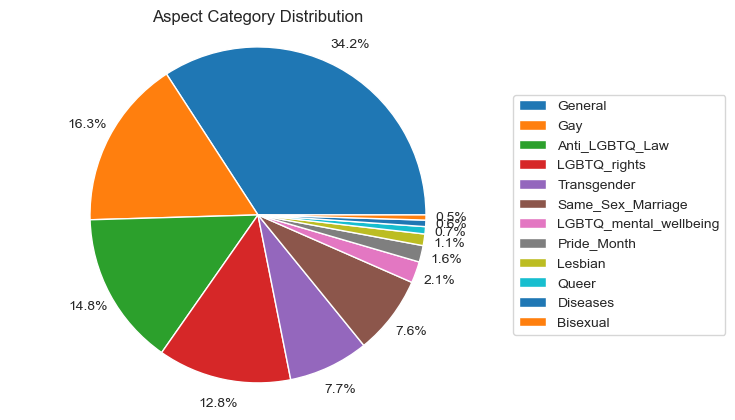

In [130]:
import seaborn as sns
aspect_term_lists = {
    'General': ['LGBT', 'LGBTQ', 'LGBTQ+', 'LGBTQIA+', 'homosexuality', 'homosexual', 'homo', 'sexual orientation', 'gender dysphoria', 'gender identity'],
    'Gay': ['Gay', 'ah gua', 'ah qua'],
    'Lesbian': ['Lesbian', 'les', 'sapphic'],
    'Bisexual': ['Bisexual'],
    'Transgender': ['Transgender', 'tranny', 'ladyboy', 'trans', 'sex reassignment'],
    'Queer': ['Queer', 'non-binary', 'non binary'],
    'Same_Sex_Marriage': ['same-sex couples', 'same-sex marriage', 'same sex marriage', 'same-sex partner', 'same sex', 'gay marriage'],
    'LGBTQ_rights': ['LGBT right', 'rights', 'IVF', 'adoption', 'housing'],
    'LGBTQ_mental_wellbeing': ['depression', 'suicide', 'mental health', 'mental illness'],
    'Diseases': ['HIV', 'HPV', 'syphilis', 'gonorrhoea', 'AIDS', 'diseases'],
    'Pride_Month': ['Pink dot', 'Wear White', 'Pride Month', 'pride parades'],
    'Anti_LGBTQ_Law': ['Anti-LGBTQ law', 'anti-LGBT laws', 'anti-LGBTQ laws', 'S377a', 'Section377a', 'section 377A', '377a', 'anti-gay law',
                       'Anti LGBTQ law', 'anti LGBT laws', 'anti LGBTQ laws', 'anti gay law', '377a penal code']
}

# Function to map text to category
def map_text_to_category(text):
    for category, terms in aspect_term_lists.items():
        for term in terms:
            if term.lower() in text.lower():
                return category
    return 'Other'  # If none of the terms are found, assign 'Other'

# Create a new column in the DataFrame mapping text to category
df['Aspect Category'] = df['Term'].apply(map_text_to_category)

category_counts = df['Aspect Category'].value_counts()
sns.set_style("whitegrid")
# Plotting the pie chart without category labels and with percentages outside
category_counts.plot(kind='pie', autopct='%1.1f%%', labels=None, pctdistance=1.15)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Remove the y-label
plt.ylabel('')

# Add a title
plt.title('Aspect Category Distribution')
plt.legend(category_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [147]:
df['community'].value_counts()

community
Reddit           17725
Hardware Zone     7477
Name: count, dtype: int64

In [131]:
def invert_sentiment(row):
    if row['Aspect Category'] == 'Anti_LGBTQ_Law' or row['Term'] == 'Wear White':
        return -row['Sentiment']
    else:
        return row['Sentiment']

# Apply the function to invert sentiment for 'Anti_LGBTQ_Law' category
df['Original_Sentiment'] = df['Sentiment']
#df['Sentiment'] = df.apply(invert_sentiment, axis=1)

print(df['Sentiment'].value_counts())

Sentiment
 0    11554
-1     7156
 1     6492
Name: count, dtype: int64


In [132]:
df.to_csv("Analysis Data.csv", index=False)

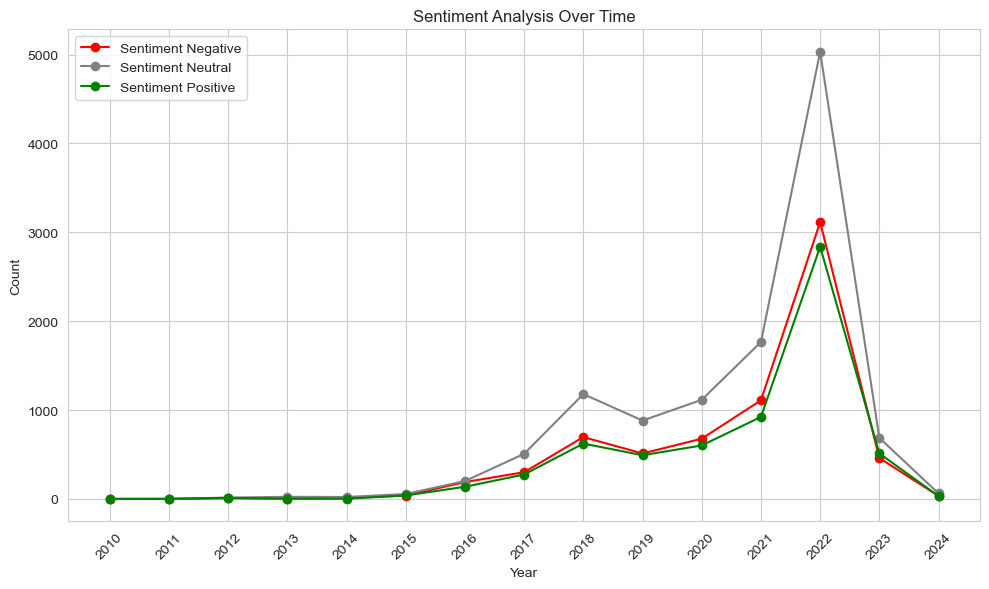

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Group by 'year_month' and 'Sentiment', and then count occurrences
sentiment_counts = df.groupby(['year_month', 'Sentiment']).size().unstack(fill_value=0)

# Generate x-axis values for smoother lines
year_months = sentiment_counts.index.astype(str)
x_values = np.arange(len(year_months))

label_mapping = {-1: 'Negative', 1: 'Positive', 0:'Neutral'}
color_mapping = {-1: 'red', 1: 'green', 0: 'grey'}
# Plotting
plt.figure(figsize=(10, 6))

# Plot lines for each sentiment label with smoothed lines
for sentiment_label in sentiment_counts.columns:
    y_values = sentiment_counts[sentiment_label]
    plt.plot(x_values, y_values, label=f'Sentiment {label_mapping[sentiment_label]}', marker='o', color = color_mapping[sentiment_label])

plt.title('Sentiment Analysis Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(x_values, year_months, rotation=45)  # Set x-axis ticks to year-month values
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)
plt.show()


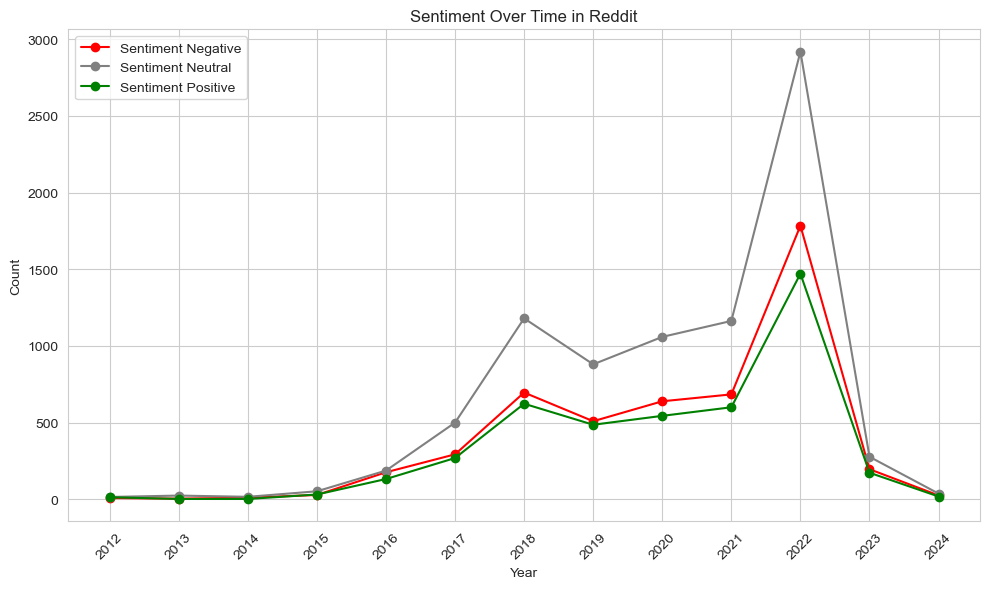

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Group by 'year_month' and 'Sentiment', and then count occurrences
sentiment_counts = df[df['community']=='Reddit'].groupby(['year_month', 'Sentiment']).size().unstack(fill_value=0)

# Generate x-axis values for smoother lines
year_months = sentiment_counts.index.astype(str)
x_values = np.arange(len(year_months))

label_mapping = {-1: 'Negative', 1: 'Positive', 0:'Neutral'}
color_mapping = {-1: 'red', 1: 'green', 0: 'grey'}
# Plotting
plt.figure(figsize=(10, 6))

# Plot lines for each sentiment label with smoothed lines
for sentiment_label in sentiment_counts.columns:
    y_values = sentiment_counts[sentiment_label]
    plt.plot(x_values, y_values, label=f'Sentiment {label_mapping[sentiment_label]}', marker='o', color = color_mapping[sentiment_label])

plt.title('Sentiment Over Time in Reddit')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(x_values, year_months, rotation=45)  # Set x-axis ticks to year-month values
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)
plt.show()


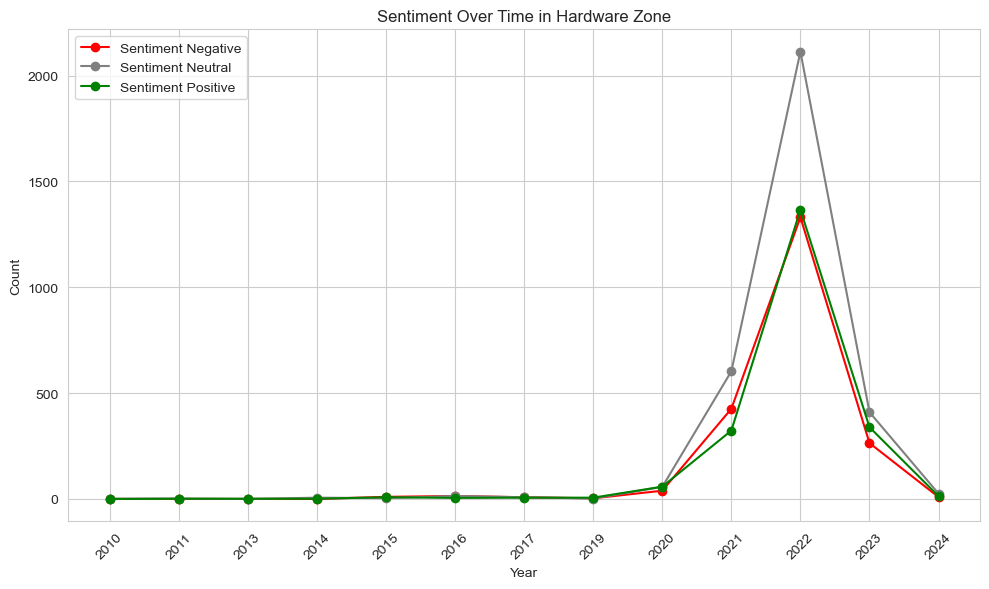

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Group by 'year_month' and 'Sentiment', and then count occurrences
sentiment_counts = df[df['community']=='Hardware Zone'].groupby(['year_month', 'Sentiment']).size().unstack(fill_value=0)

# Generate x-axis values for smoother lines
year_months = sentiment_counts.index.astype(str)
x_values = np.arange(len(year_months))

label_mapping = {-1: 'Negative', 1: 'Positive', 0:'Neutral'}
color_mapping = {-1: 'red', 1: 'green', 0: 'grey'}
# Plotting
plt.figure(figsize=(10, 6))

# Plot lines for each sentiment label with smoothed lines
for sentiment_label in sentiment_counts.columns:
    y_values = sentiment_counts[sentiment_label]
    plt.plot(x_values, y_values, label=f'Sentiment {label_mapping[sentiment_label]}', marker='o', color = color_mapping[sentiment_label])

plt.title('Sentiment Over Time in Hardware Zone')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(x_values, year_months, rotation=45)  # Set x-axis ticks to year-month values
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)
plt.show()


In [136]:
reddit_df = df[df['community'] == 'Reddit']

hwz_df = df[df['community'] != 'Reddit']

negative_df = df[df['Sentiment']==-1]
positive_df = df[df['Sentiment']==1]
neutral_df = df[df['Sentiment']==0]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeffr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


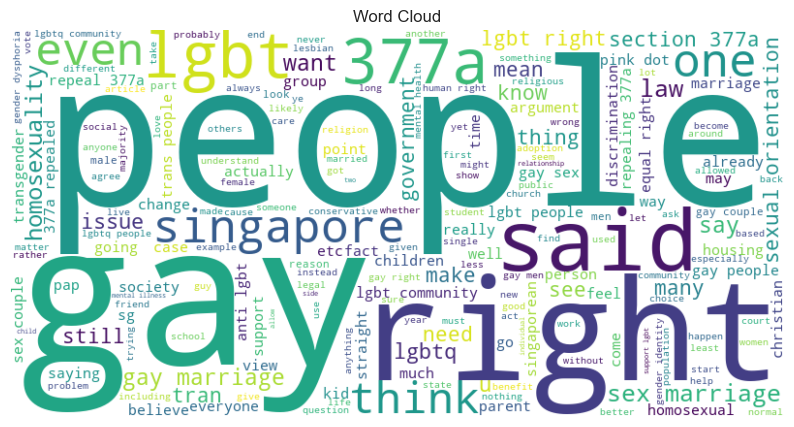

In [137]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Download NLTK stopwords list (run only once)
import nltk
nltk.download('stopwords')

# Combine all text from the 'original_content' column into a single string
text = ' '.join(df['Sentence'])

# Tokenize the text
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))


filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Join the filtered tokens back into a single string
filtered_text = ' '.join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeffr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


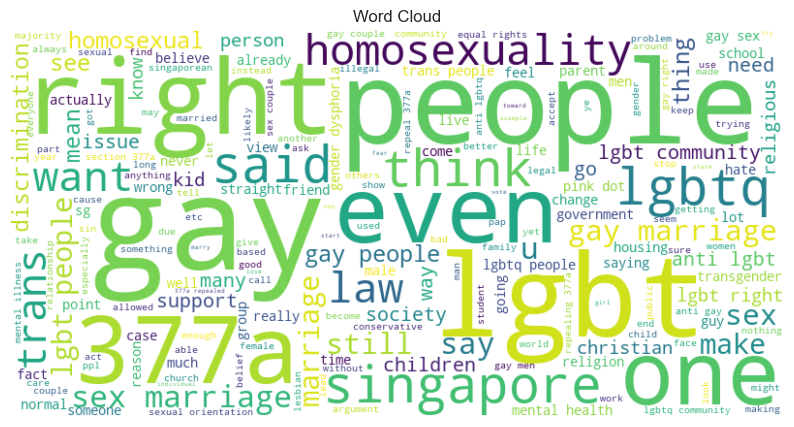

In [138]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Download NLTK stopwords list (run only once)
import nltk
nltk.download('stopwords')

# Combine all text from the 'original_content' column into a single string
text = ' '.join(negative_df['Sentence'])

# Tokenize the text
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))


filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Join the filtered tokens back into a single string
filtered_text = ' '.join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeffr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


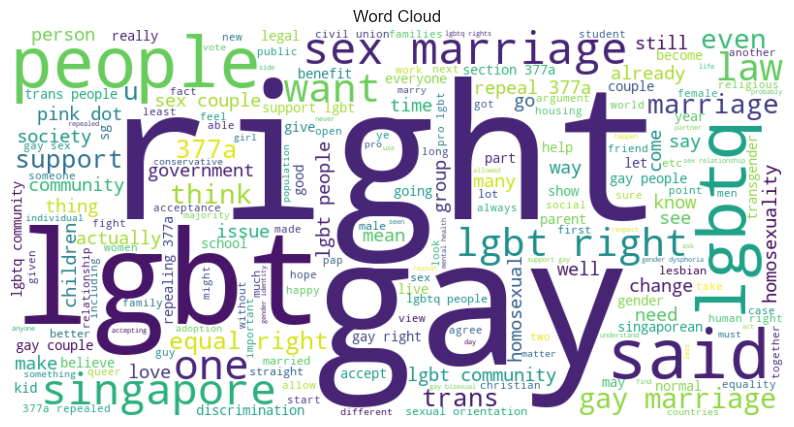

In [139]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Download NLTK stopwords list (run only once)
import nltk
nltk.download('stopwords')

# Combine all text from the 'original_content' column into a single string
text = ' '.join(positive_df['Sentence'])

# Tokenize the text
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))


filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Join the filtered tokens back into a single string
filtered_text = ' '.join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


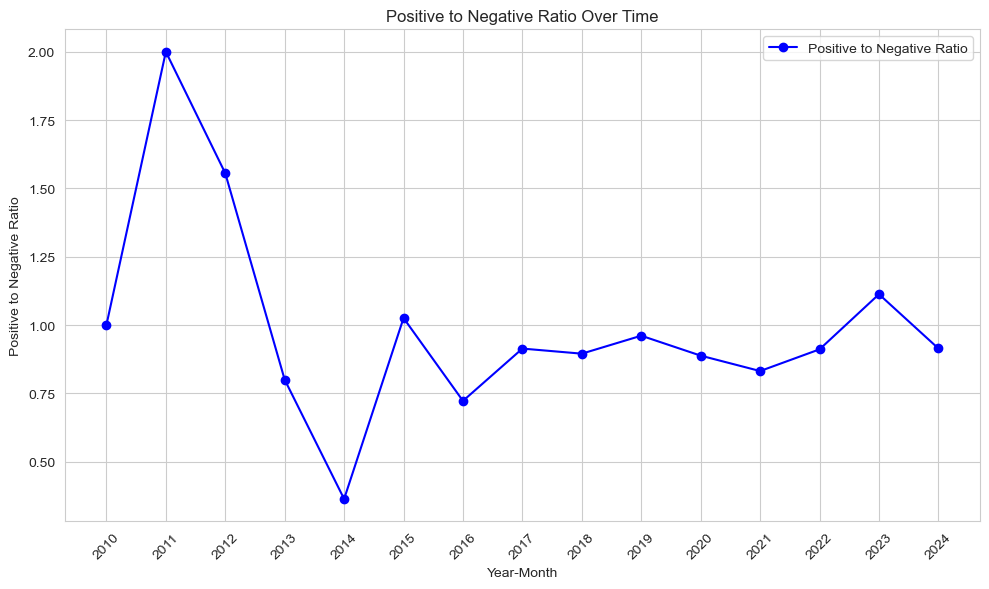

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Group by 'year_month' and 'Sentiment', and then count occurrences
sentiment_counts = df.groupby(['year_month', 'Sentiment']).size().unstack(fill_value=0)

# Calculate positive to negative ratio for each year-month
sentiment_counts['pos_to_neg_ratio'] = (sentiment_counts[1] + 1) / (sentiment_counts[-1] + 1)

# Generate x-axis values for smoother lines
year_months = sentiment_counts.index.astype(str)
x_values = np.arange(len(year_months))

# Plotting
plt.figure(figsize=(10, 6))

# Plot positive to negative ratio for each year-month
plt.plot(x_values, sentiment_counts['pos_to_neg_ratio'], marker='o', color='b', label='Positive to Negative Ratio')

plt.title('Positive to Negative Ratio Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Positive to Negative Ratio')
plt.legend()
plt.xticks(x_values, year_months, rotation=45)  # Set x-axis ticks to year-month values
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)
plt.show()


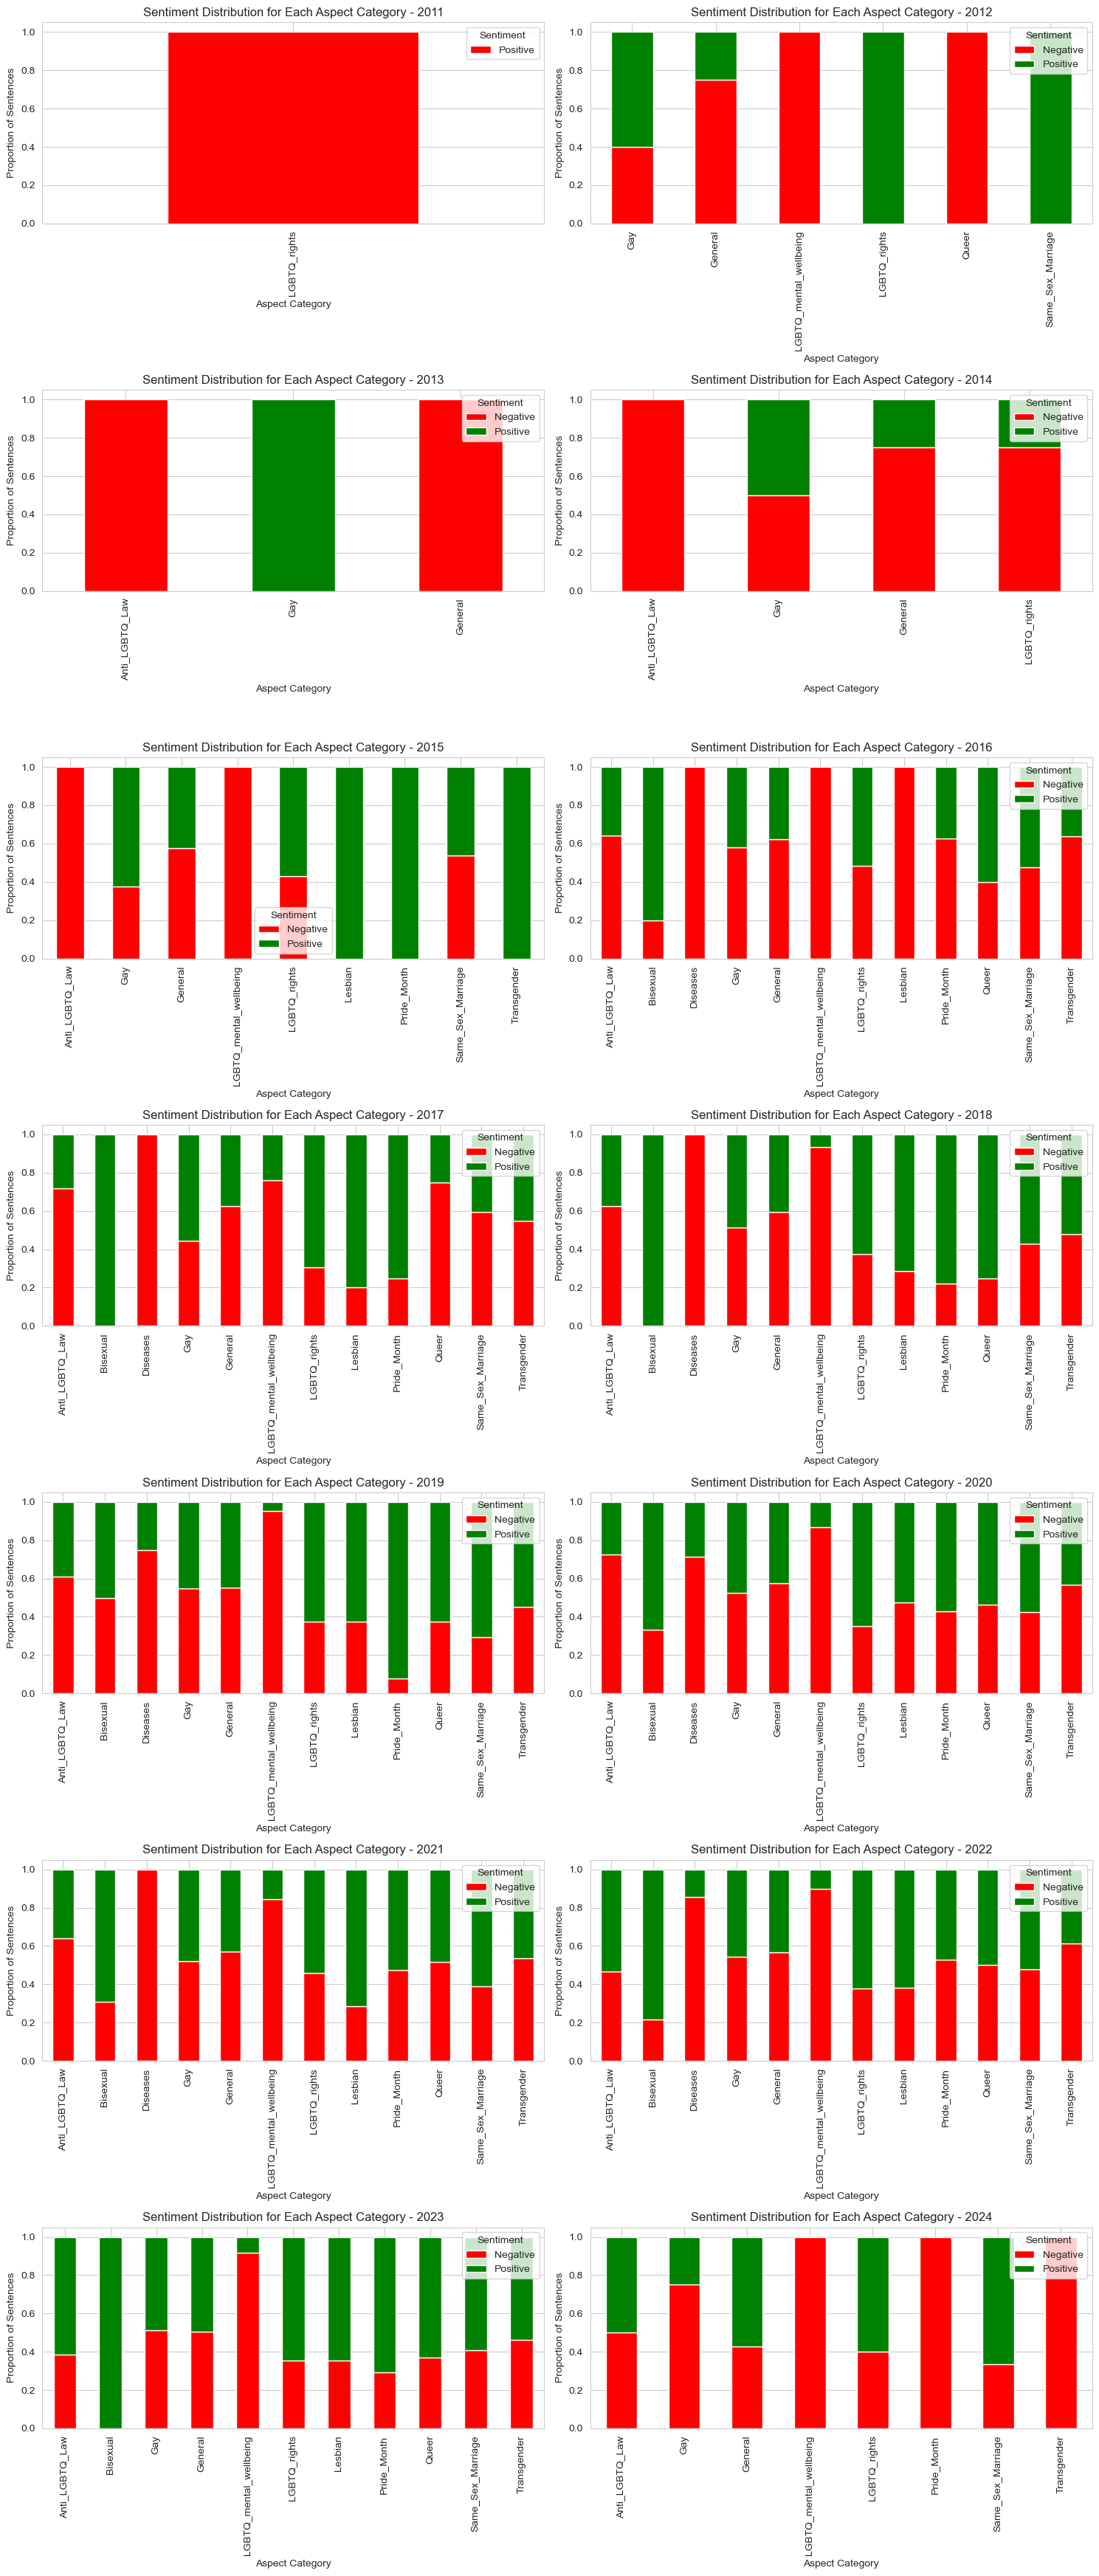

In [141]:
filtered_df = df[df['Sentiment'].isin([-1, 1])]

# Get unique years from the DataFrame
unique_years = filtered_df['year_month'].unique()

# Calculate the number of rows and columns for subplots
num_rows = (len(unique_years) + 1) // 2  # Add 1 to round up if there is an odd number of years
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

unique_years = np.sort(unique_years)
# Flatten the axes if needed
if len(unique_years) > 1:
    axes = axes.flatten()

color_label = { -1: 'red', 1: 'green'}
# Iterate over each unique year
for i, year in enumerate(unique_years):
    # Filter the DataFrame for the current year
    year_df = filtered_df[filtered_df['year_month'] == year]
    
    # Group by 'Aspect Category' and calculate sentiment distribution for the current year
    sentiment_distribution = year_df.groupby('Aspect Category')['Sentiment'].value_counts(normalize=True).unstack(fill_value=0)

    # Plot the stacked bar chart for the current year
    sentiment_distribution.plot(kind='bar', stacked=True, ax=axes[i], color=['red', 'green'])
    
    # Replace legend labels
    legend_labels = {1: 'Positive', -1: 'Negative'}
    handles, labels = axes[i].get_legend_handles_labels()

    new_labels = [legend_labels[int(label)] for label in labels]
    axes[i].legend(handles, new_labels, title='Sentiment')

    # Add labels and title
    axes[i].set_title(f'Sentiment Distribution for Each Aspect Category - {year}')
    axes[i].set_xlabel('Aspect Category')
    axes[i].set_ylabel('Proportion of Sentences')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


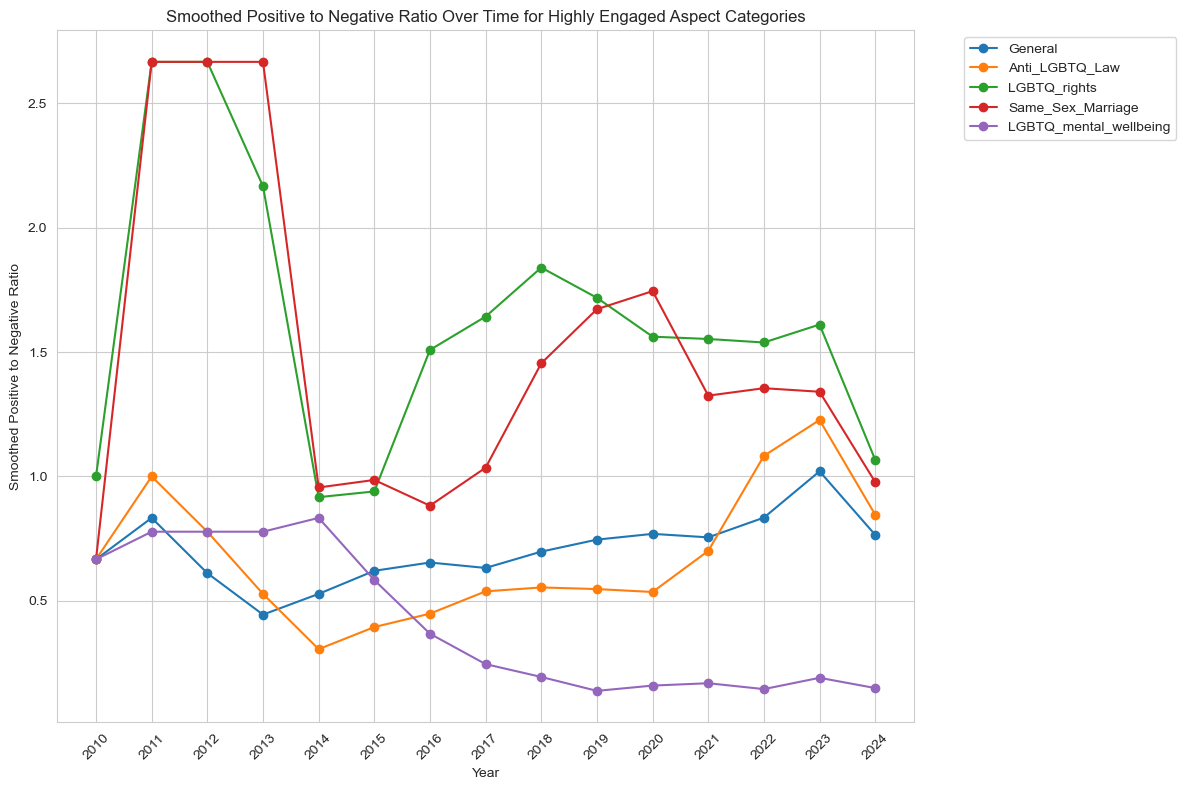

In [142]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Convert year_month to datetime objects and sort them in ascending order
df.sort_values(by='year_month', inplace=True)

# Group by 'year_month' and 'Aspect Category' and 'Sentiment', and then count occurrences
aspect_sentiment_counts = df.groupby(['year_month', 'Aspect Category', 'Sentiment']).size().unstack(fill_value=0)

# Calculate positive to negative ratio for each aspect category and year-month
aspect_sentiment_counts['pos_to_neg_ratio'] = (aspect_sentiment_counts[1]+1) / (aspect_sentiment_counts[-1]+1)

# Reset index to flatten the MultiIndex
aspect_sentiment_counts = aspect_sentiment_counts.reset_index()

# Generate x-axis values for all months
all_months = df['year_month'].unique()
x_values = np.arange(len(all_months))

# Specify the aspect categories to plot
categories_to_plot = ['General', 'Anti_LGBTQ_Law','LGBTQ_rights','Same_Sex_Marriage','LGBTQ_mental_wellbeing']

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each aspect category
for category in categories_to_plot:
    if category in aspect_sentiment_counts['Aspect Category'].unique():
        # Get the positive to negative ratio for the category
        category_ratios = aspect_sentiment_counts.loc[aspect_sentiment_counts['Aspect Category'] == category]

        # Create an empty array to store the ratios for all months
        category_ratios_all_months = np.zeros(len(all_months))

        # Fill the array with the ratios for the available months
        for i, month in enumerate(all_months):
            if month in category_ratios['year_month'].values:
                category_ratios_all_months[i] = category_ratios.loc[category_ratios['year_month'] == month, 'pos_to_neg_ratio'].values[0]
            else:
                category_ratios_all_months[i] = 1  # Fill missing values with 1

        # Smoothen the line using a moving average
        window_size = 3  # Specify the size of the moving average window
        smoothed_ratios = np.convolve(category_ratios_all_months, np.ones(window_size) / window_size, mode='same')

        # Plot the smoothed line
        plt.plot(x_values, smoothed_ratios, marker='o', label=f'{category}')

plt.title('Smoothed Positive to Negative Ratio Over Time for Highly Engaged Aspect Categories')
plt.xlabel('Year')
plt.ylabel('Smoothed Positive to Negative Ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.xticks(x_values, all_months, rotation=45)  # Set x-axis ticks to all months
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


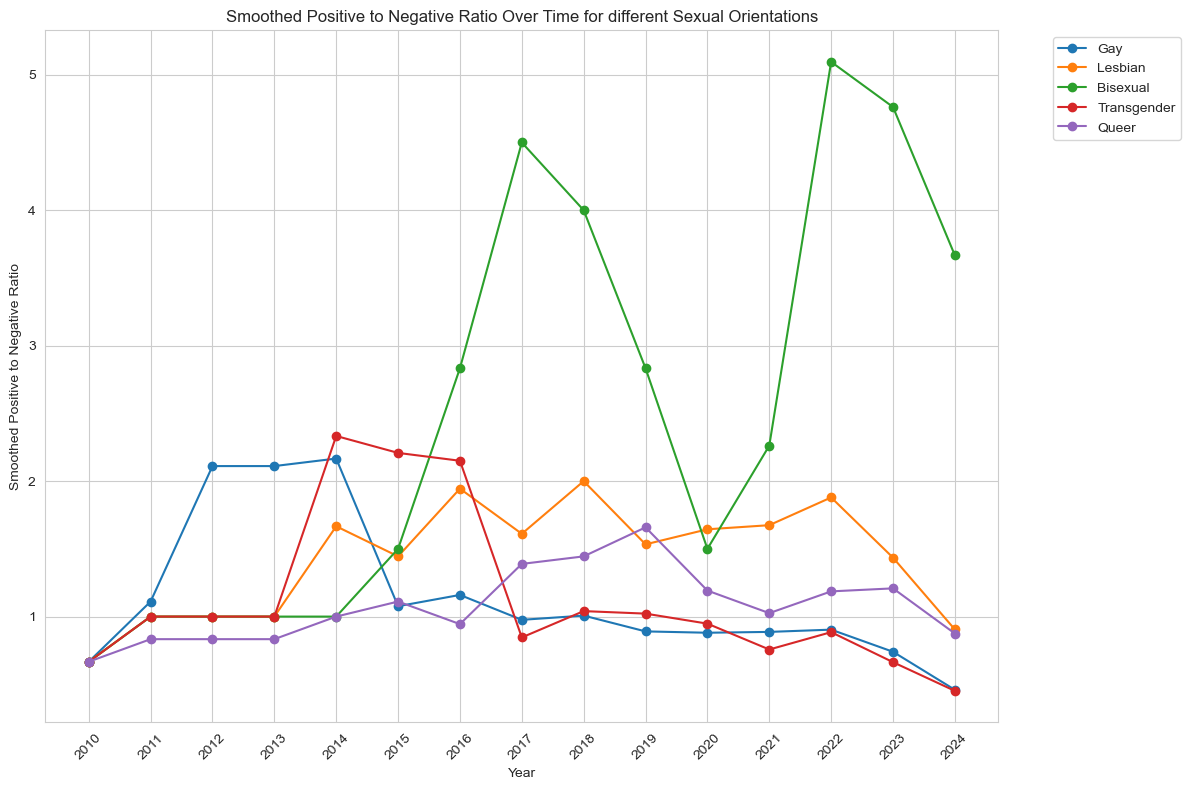

In [143]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Convert year_month to datetime objects and sort them in ascending order
df.sort_values(by='year_month', inplace=True)

# Group by 'year_month' and 'Aspect Category' and 'Sentiment', and then count occurrences
aspect_sentiment_counts = df.groupby(['year_month', 'Aspect Category', 'Sentiment']).size().unstack(fill_value=0)

# Calculate positive to negative ratio for each aspect category and year-month
aspect_sentiment_counts['pos_to_neg_ratio'] = (aspect_sentiment_counts[1]+1) / (aspect_sentiment_counts[-1]+1)

# Reset index to flatten the MultiIndex
aspect_sentiment_counts = aspect_sentiment_counts.reset_index()

# Generate x-axis values for all months
all_months = df['year_month'].unique()
x_values = np.arange(len(all_months))

# Specify the aspect categories to plot
categories_to_plot = ['Gay', 'Lesbian', 'Bisexual', 'Transgender', 'Queer']

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each aspect category
for category in categories_to_plot:
    if category in aspect_sentiment_counts['Aspect Category'].unique():
        # Get the positive to negative ratio for the category
        category_ratios = aspect_sentiment_counts.loc[aspect_sentiment_counts['Aspect Category'] == category]

        # Create an empty array to store the ratios for all months
        category_ratios_all_months = np.zeros(len(all_months))

        # Fill the array with the ratios for the available months
        for i, month in enumerate(all_months):
            if month in category_ratios['year_month'].values:
                category_ratios_all_months[i] = category_ratios.loc[category_ratios['year_month'] == month, 'pos_to_neg_ratio'].values[0]
            else:
                category_ratios_all_months[i] = 1  # Fill missing values with 1

        # Smoothen the line using a moving average
        window_size = 3  # Specify the size of the moving average window
        smoothed_ratios = np.convolve(category_ratios_all_months, np.ones(window_size) / window_size, mode='same')

        # Plot the smoothed line
        plt.plot(x_values, smoothed_ratios, marker='o', label=f'{category}')

plt.title('Smoothed Positive to Negative Ratio Over Time for different Sexual Orientations')
plt.xlabel('Year')
plt.ylabel('Smoothed Positive to Negative Ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.xticks(x_values, all_months, rotation=45)  # Set x-axis ticks to all months
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


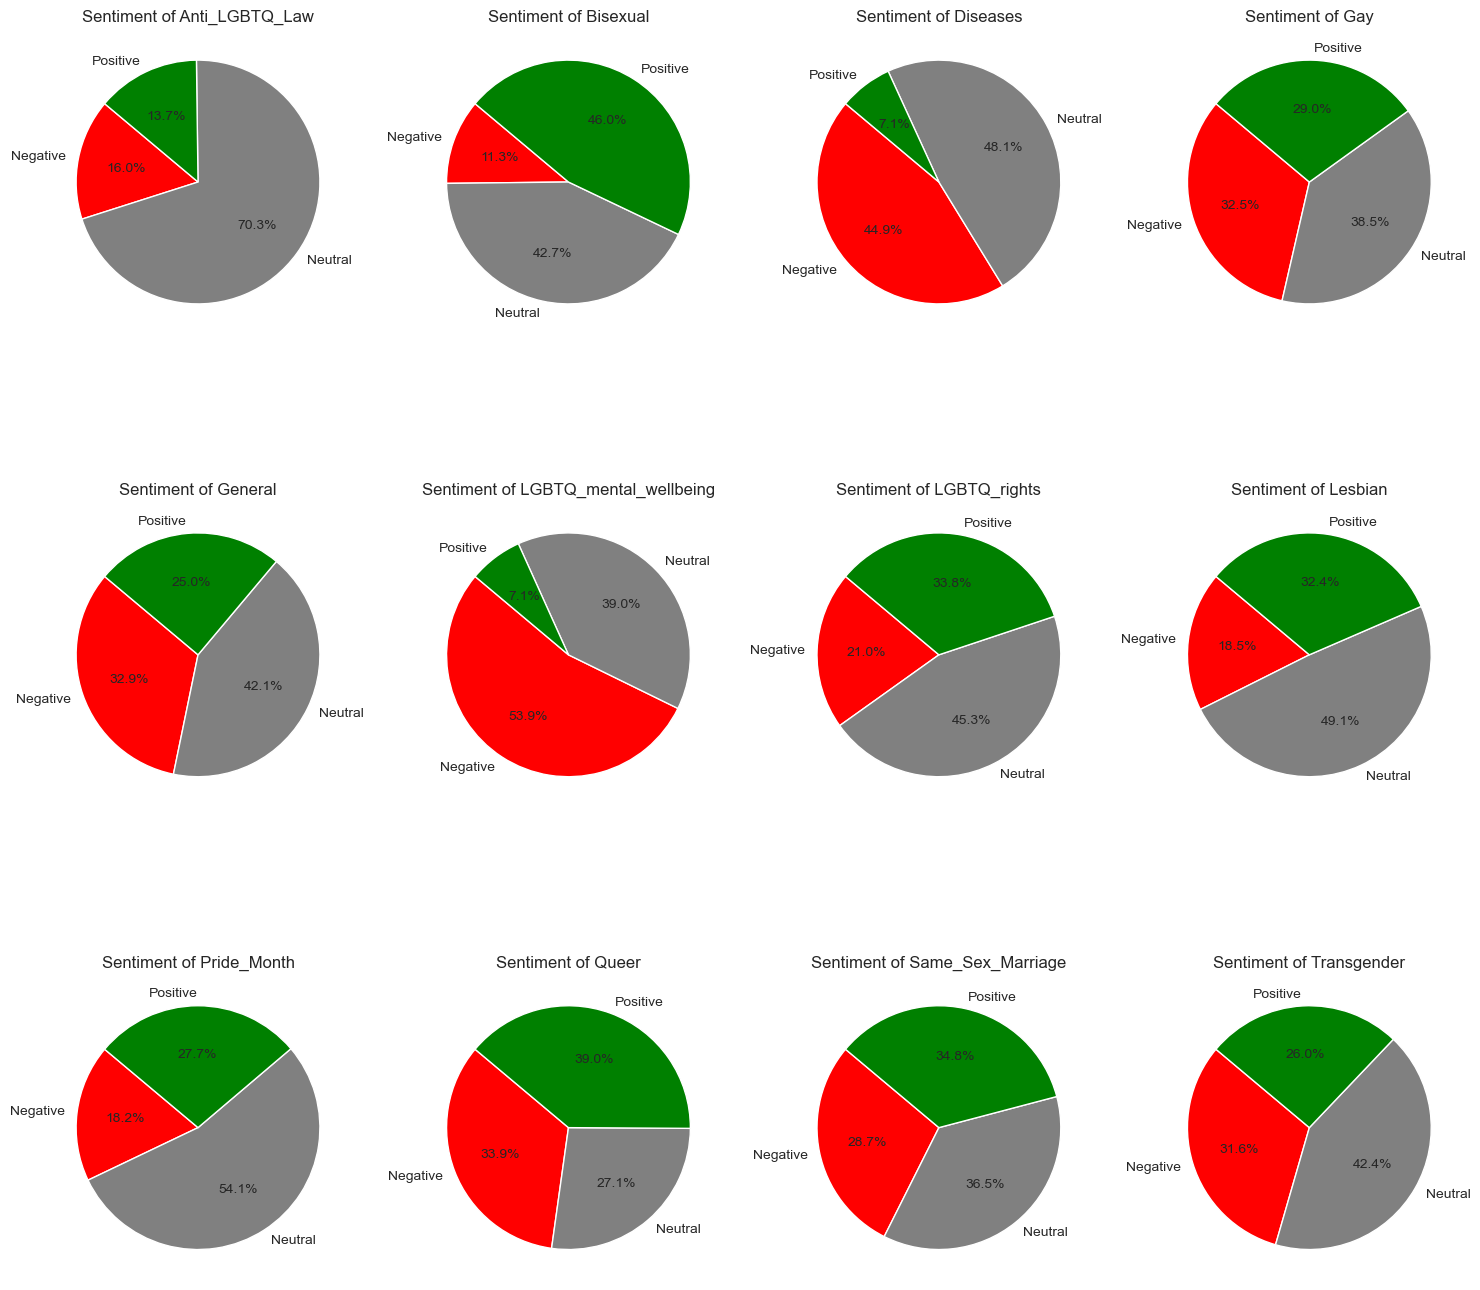

In [144]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define mapping of sentiment values to labels and colors
mapping = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
color_mapping = {-1: 'red', 0: 'grey', 1: 'green'}

# Group by 'Aspect Category' and 'Sentiment', and then count occurrences
sentiment_distribution = df.groupby(['Aspect Category', 'Sentiment']).size().unstack(fill_value=0)

# Get number of categories
num_categories = len(sentiment_distribution.index)

# Calculate grid size
num_cols = 4  # Number of columns in the grid
num_rows = (num_categories + num_cols - 1) // num_cols  # Number of rows needed

# Plotting pie charts in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, category in enumerate(sentiment_distribution.index):
    # Calculate row and column index for subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Get sentiment distribution for the category
    category_distribution = sentiment_distribution.loc[category]
    
    # Convert sentiment values to labels using mapping
    labels = [mapping.get(sentiment, 'Unknown') for sentiment in category_distribution.index]
    
    # Get colors based on sentiment values
    colors = [color_mapping.get(sentiment, 'black') for sentiment in category_distribution.index]
    
    # Plot pie chart with labels and colors
    axes[row_idx, col_idx].pie(category_distribution, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[row_idx, col_idx].set_title(f'Sentiment of {category}')

# Adjust layout
plt.tight_layout()
plt.show()


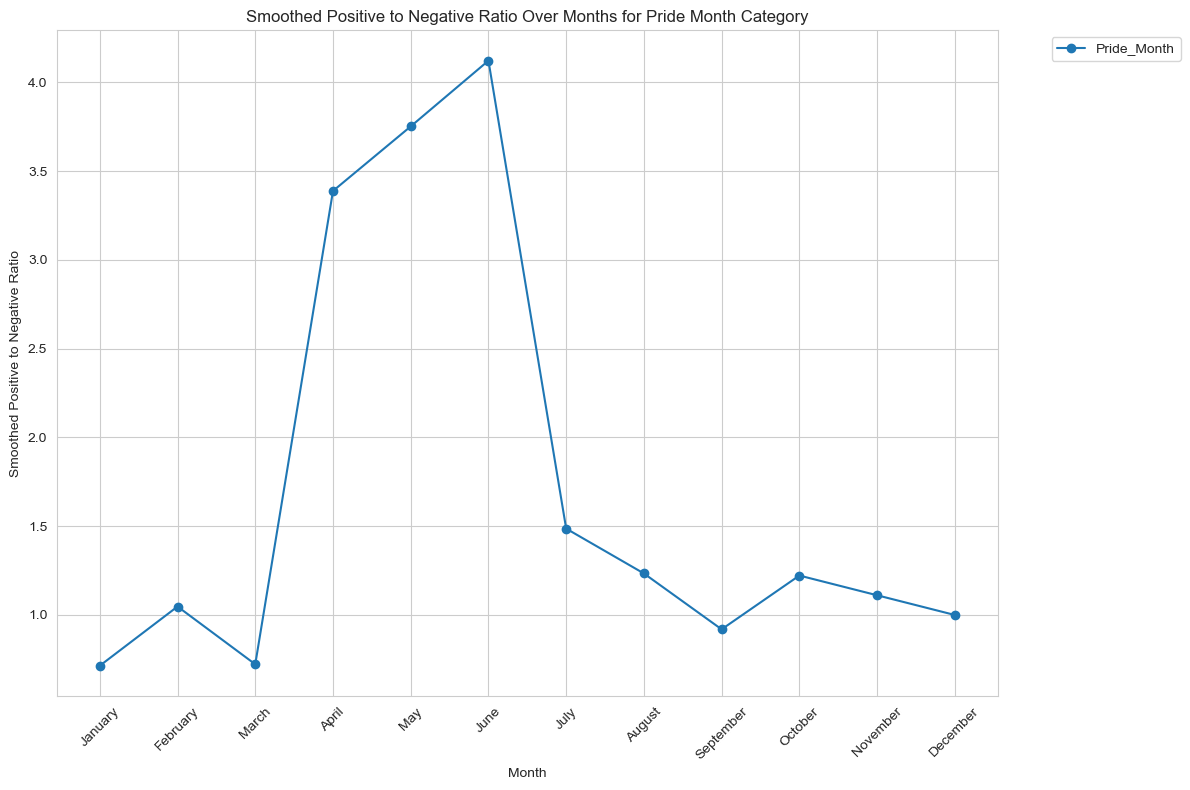

In [145]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Convert year_month to datetime objects and sort them in ascending order
df['month'] = df['month'].astype(int)
df.sort_values(by='month', inplace=True)
# Group by 'year_month' and 'Aspect Category' and 'Sentiment', and then count occurrences
aspect_sentiment_counts = df.groupby(['month', 'Aspect Category', 'Sentiment']).size().unstack(fill_value=0)

# Calculate positive to negative ratio for each aspect category and year-month
aspect_sentiment_counts['pos_to_neg_ratio'] = (aspect_sentiment_counts[1]+1) / (aspect_sentiment_counts[-1]+1)

# Reset index to flatten the MultiIndex
aspect_sentiment_counts = aspect_sentiment_counts.reset_index()

# Generate x-axis values for all months
all_months = df['month'].unique()
x_values = np.arange(len(all_months))

# Specify the aspect categories to plot
categories_to_plot = ["Pride_Month"]

month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each aspect category
for category in categories_to_plot:
    if category in aspect_sentiment_counts['Aspect Category'].unique():
        # Get the positive to negative ratio for the category
        category_ratios = aspect_sentiment_counts.loc[aspect_sentiment_counts['Aspect Category'] == category]

        # Create an empty array to store the ratios for all months
        category_ratios_all_months = np.zeros(len(all_months))

        # Fill the array with the ratios for the available months
        for i, month in enumerate(all_months):
            if month in category_ratios['month'].values:
                category_ratios_all_months[i] = category_ratios.loc[category_ratios['month'] == month, 'pos_to_neg_ratio'].values[0]
            else:
                category_ratios_all_months[i] = 1  # Fill missing values with 1

        # Smoothen the line using a moving average
        window_size = 3  # Specify the size of the moving average window
        smoothed_ratios = np.convolve(category_ratios_all_months, np.ones(window_size) / window_size, mode='same')
        # Plot the smoothed line
        plt.plot(x_values, smoothed_ratios, marker='o', label=f'{category}')

x_lab = [month_mapping[i] for i in all_months]
plt.title('Smoothed Positive to Negative Ratio Over Months for Pride Month Category')
plt.xlabel('Month')
plt.ylabel('Smoothed Positive to Negative Ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.xticks(x_values, x_lab, rotation=45)  # Set x-axis ticks to all months
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


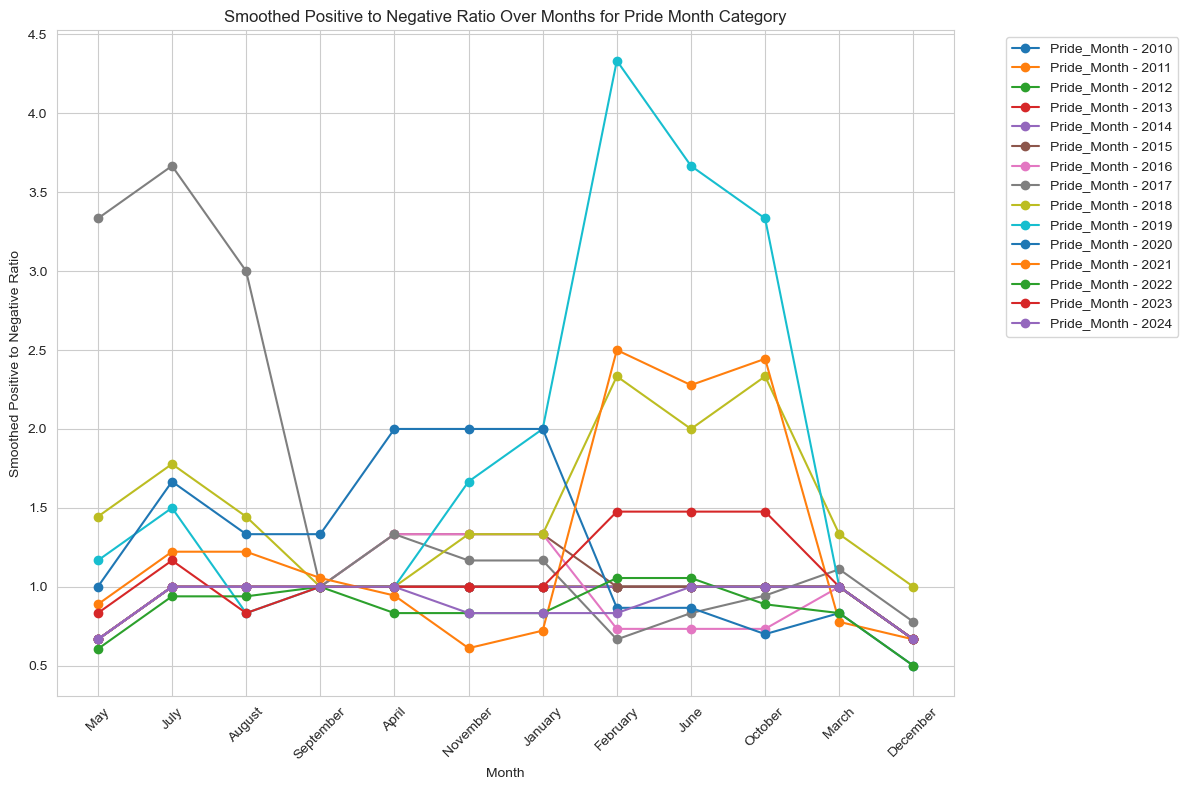

In [146]:
df['month'] = df['month'].astype(int)
df.sort_values(by=['year', 'month'], inplace=True)
pride_df = df[df['Aspect Category'] == "Pride_Month"]
# Group by 'year_month', 'Aspect Category', 'Sentiment', and 'year', and then count occurrences
aspect_sentiment_counts = df.groupby(['year', 'month', 'Aspect Category', 'Sentiment']).size().unstack(fill_value=0)

# Calculate positive to negative ratio for each aspect category, year, and year-month
aspect_sentiment_counts['pos_to_neg_ratio'] = (aspect_sentiment_counts[1]+1) / (aspect_sentiment_counts[-1]+1)

# Reset index to flatten the MultiIndex
aspect_sentiment_counts = aspect_sentiment_counts.reset_index()

# Generate x-axis values for all months
all_months = df['month'].unique()
x_values = np.arange(len(all_months))

# Specify the aspect categories to plot
categories_to_plot = ["Pride_Month"]

month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each aspect category
for category in categories_to_plot:
    if category in aspect_sentiment_counts['Aspect Category'].unique():
        # Get the positive to negative ratio for the category
        category_ratios = aspect_sentiment_counts.loc[aspect_sentiment_counts['Aspect Category'] == category]

        # Loop through each year
        for year in aspect_sentiment_counts['year'].unique():
            year_data = category_ratios[category_ratios['year'] == year]

            # Create an empty array to store the ratios for all months
            category_ratios_all_months = np.zeros(len(all_months))

            # Fill the array with the ratios for the available months
            for i, month in enumerate(all_months):
                if month in year_data['month'].values:
                    category_ratios_all_months[i] = year_data.loc[year_data['month'] == month, 'pos_to_neg_ratio'].values[0]
                else:
                    category_ratios_all_months[i] = 1  # Fill missing values with 1

            # Smoothen the line using a moving average
            window_size = 3  # Specify the size of the moving average window
            smoothed_ratios = np.convolve(category_ratios_all_months, np.ones(window_size) / window_size, mode='same')

            # Plot the smoothed line
            plt.plot(x_values, smoothed_ratios, marker='o', label=f'{category} - {year}')

x_lab = [month_mapping[i] for i in all_months]
plt.title('Smoothed Positive to Negative Ratio Over Months for Pride Month Category')
plt.xlabel('Month')
plt.ylabel('Smoothed Positive to Negative Ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.xticks(x_values, x_lab, rotation=45)  # Set x-axis ticks to all months
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()